# PRMT-2318 Investigate Large Messaging Errors for Vision in July

## Context
We saw a large increase in Large messaging errors in July (0.34% increase compared with June - 0.14% of all transfers) where Vision was the sender  in July.

We want to look at the trend over the month, as Large Messaging was rolled out across all vision practices towards the end of the month.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
transfer_file_location = "s3://prm-gp2gp-transfer-data-dev/v4/"
transfer_files = [
    "2021/5/transfers.parquet",
    "2021/6/transfers.parquet",
    "2021/7/transfers.parquet"
]
transfer_input_files = [transfer_file_location + f for f in transfer_files]
transfers_raw = pd.concat((
    pd.read_parquet(f)
    for f in transfer_input_files
))

In [3]:
transfers = transfers_raw.copy()
transfers["status"] = transfers["status"].str.replace("_", " ").str.title()

## Vision as a sender

In [4]:
vision_sender_bool = transfers["sending_supplier"]=="Vision"
has_23_error_bool = transfers["sender_error_codes"].apply(lambda error_codes: 23 in error_codes)
vision_transfers_with_error_23 = transfers[vision_sender_bool & has_23_error_bool].copy()

In [5]:
vision_transfers_with_error_23["date"] = vision_transfers_with_error_23["date_requested"].dt.date

(array([18748., 18762., 18779., 18793., 18809., 18823., 18840.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

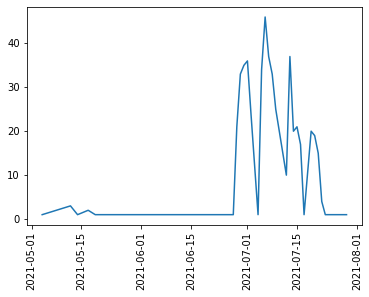

In [6]:
sender_grouped_by_date = vision_transfers_with_error_23.groupby(by="date").agg({"conversation_id": "count"}).reset_index()
plt.plot(sender_grouped_by_date['date'], sender_grouped_by_date['conversation_id'])
plt.xticks(rotation='vertical')

## Vision as a requester

In [7]:
vision_requester_bool = transfers["requesting_supplier"]=="Vision"
has_14_error_bool = transfers["sender_error_codes"].apply(lambda error_codes: 14 in error_codes)
vision_transfers_with_error_14 = transfers[vision_requester_bool & has_14_error_bool].copy()

In [8]:
vision_transfers_with_error_14["date"] = vision_transfers_with_error_14["date_requested"].dt.date

(array([18748., 18762., 18779., 18793., 18809., 18823., 18840.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

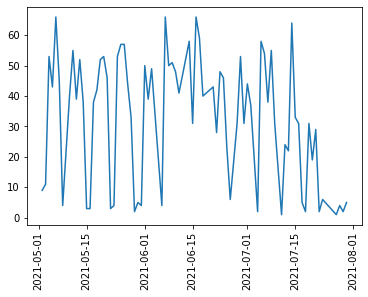

In [9]:
requester_grouped_by_date = vision_transfers_with_error_14.groupby(by="date").agg({"conversation_id": "count"}).reset_index()
plt.plot(requester_grouped_by_date['date'], requester_grouped_by_date['conversation_id'])
plt.xticks(rotation='vertical')